In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('compact.csv') 

In [3]:
print(data.columns) 

Index(['country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'excess_mortality', 'excess_mortality_cumulative',
       'excess_mortality_cumulative_absolute',
       'excess_mortality_cumulative_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'icu_patients',
       'icu_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'stringency_index',
       'reproduction_rate', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
    

In [4]:
df_hungary = data[data['country'] == 'Hungary'] 
print(df_hungary['new_vaccinations'].describe()) 


count       127.000000
mean      65168.535433
std       47254.500443
min        1925.000000
25%       21981.000000
50%       59533.000000
75%      101377.500000
max      187488.000000
Name: new_vaccinations, dtype: float64


In [5]:
df_hungary = df_hungary.fillna(0)
print(df_hungary)

        country        date  total_cases  new_cases  new_cases_smoothed  \
209751  Hungary  2020-01-01          0.0        0.0                 0.0   
209752  Hungary  2020-01-02          0.0        0.0                 0.0   
209753  Hungary  2020-01-03          0.0        0.0                 0.0   
209754  Hungary  2020-01-04          0.0        0.0                 0.0   
209755  Hungary  2020-01-05          0.0        0.0                 0.0   
...         ...         ...          ...        ...                 ...   
211851  Hungary  2025-11-30          0.0        0.0                 0.0   
211852  Hungary  2025-12-07          0.0        0.0                 0.0   
211853  Hungary  2025-12-14          0.0        0.0                 0.0   
211854  Hungary  2025-12-21          0.0        0.0                 0.0   
211855  Hungary  2025-12-28          0.0        0.0                 0.0   

        total_cases_per_million  new_cases_per_million  \
209751                      0.0          

In [6]:
df_hungary = df_hungary[['country', 'date', 'new_vaccinations']].sort_values('new_vaccinations', ascending=False) 
print(df_hungary)

        country        date  new_vaccinations
210212  Hungary  2021-04-06          187488.0
210236  Hungary  2021-04-30          177418.0
210207  Hungary  2021-04-01          166720.0
210233  Hungary  2021-04-27          156668.0
210257  Hungary  2021-05-21          151513.0
...         ...         ...               ...
210533  Hungary  2022-02-21               0.0
210532  Hungary  2022-02-20               0.0
210531  Hungary  2022-02-19               0.0
210530  Hungary  2022-02-18               0.0
211855  Hungary  2025-12-28               0.0

[2105 rows x 3 columns]


In [7]:
df_hungary = df_hungary[df_hungary['new_vaccinations'] > 0]
print(df_hungary)

        country        date  new_vaccinations
210212  Hungary  2021-04-06          187488.0
210236  Hungary  2021-04-30          177418.0
210207  Hungary  2021-04-01          166720.0
210233  Hungary  2021-04-27          156668.0
210257  Hungary  2021-05-21          151513.0
...         ...         ...               ...
210156  Hungary  2021-02-09            4406.0
210139  Hungary  2021-01-23            3264.0
210140  Hungary  2021-01-24            2706.0
210161  Hungary  2021-02-14            2253.0
210135  Hungary  2021-01-19            1925.0

[127 rows x 3 columns]


In [8]:
df_hungary = df_hungary.sort_values('date')
print(df_hungary)

        country        date  new_vaccinations
210135  Hungary  2021-01-19            1925.0
210136  Hungary  2021-01-20            5327.0
210137  Hungary  2021-01-21            6214.0
210138  Hungary  2021-01-22            5330.0
210139  Hungary  2021-01-23            3264.0
...         ...         ...               ...
210266  Hungary  2021-05-30           39061.0
210267  Hungary  2021-05-31           73638.0
210268  Hungary  2021-06-01           69276.0
210269  Hungary  2021-06-02           58017.0
210270  Hungary  2021-06-03           93527.0

[127 rows x 3 columns]


In [9]:
gby_date = df_hungary.groupby('date').sum()
gby_date = gby_date.astype({'new_vaccinations': 'int64'})

# print(gby_date.nlargest(columns='new_vaccinations', n=1)) # max value using nlargest

max_date = gby_date['new_vaccinations'].idxmax() 
max_value = gby_date.loc[max_date, 'new_vaccinations'] # .loc[row, column]

print(f"Max new vaccinations: {max_value} on {max_date}")

Max new vaccinations: 187488 on 2021-04-06


In [10]:
colors = []
for val in gby_date['new_vaccinations']:
    if val == max_value:
        colors.append('red')
    else:
        colors.append('#1f77b4')

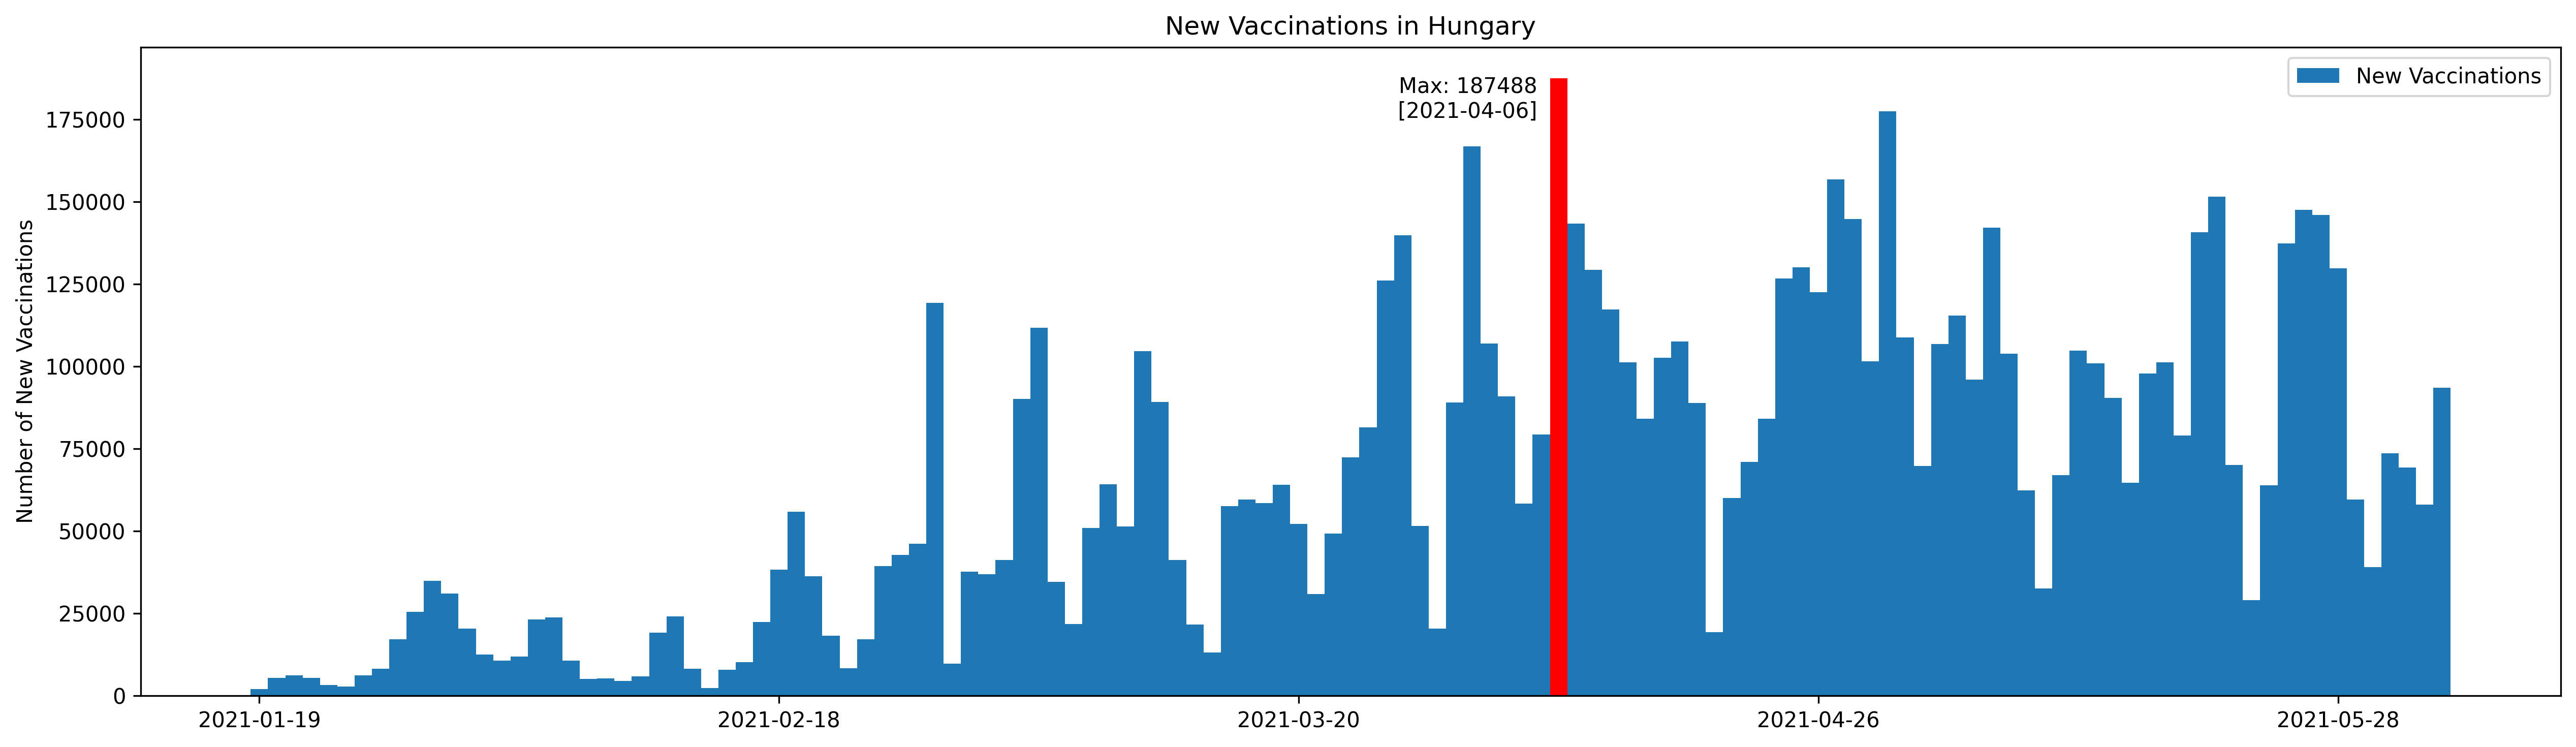

In [13]:
plt.figure(figsize=(17,5), dpi=300)
plt.bar(df_hungary['date'], df_hungary['new_vaccinations'], label='New Vaccinations', width = 1, color=colors)
# plt.xlabel('Date')
plt.ylabel('Number of New Vaccinations')
plt.title('New Vaccinations in Hungary')
plt.xticks(rotation=0, ticks=range(0, len(df_hungary['date']), 30), labels=df_hungary['date'][::30])
plt.legend()
plt.tight_layout()
plt.annotate(f'Max: {max_value}\n [{max_date}]',
            xy=(max_date, max_value),
            xytext=(-10, -10),
            textcoords='offset points',
            ha='right', va='center')
plt.show()

In [14]:
df_hungary = data[data['country'] == 'hungary'][['country', 'date', 'new_vaccinations', 'total_vaccinations']].dropna()
print(df_hungary)

# print(df_hungary[['total_vaccinations']].describe())

Empty DataFrame
Columns: [country, date, new_vaccinations, total_vaccinations]
Index: []


In [19]:
ten_mil = df_hungary[df_hungary.total_vaccinations >= 5000000][['date', 'total_vaccinations']]
print(ten_mil.sort_values('date'))
print(ten_mil.min())

Empty DataFrame
Columns: [date, total_vaccinations]
Index: []
date                  NaN
total_vaccinations    NaN
dtype: object


In [20]:
min_date = ten_mil.date.min() 
colors = ['red' if d == min_date else '#1f77b4' for d in df_hungary['date']]
# print(len(df_hungary['date']))

In [17]:
df_hungary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             0 non-null      object 
 1   date                0 non-null      object 
 2   new_vaccinations    0 non-null      float64
 3   total_vaccinations  0 non-null      float64
dtypes: float64(2), object(2)
memory usage: 0.0+ bytes


In [30]:
df_hungary = data[data['country'] == 'Hungary'][['date', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']]
df_hungary = df_hungary.dropna(subset=['people_fully_vaccinated_per_hundred'])
print(df_hungary)
# print(df_hungary.isna().sum())
print(len(df_hungary))

              date  people_vaccinated_per_hundred  \
210134  2021-01-18                       1.339166   
210135  2021-01-19                       1.345661   
210136  2021-01-20                       1.389402   
210137  2021-01-21                       1.435136   
210138  2021-01-22                       1.478516   
...            ...                            ...   
210793  2022-11-08                      66.288340   
210800  2022-11-15                      66.290310   
210807  2022-11-22                      66.292770   
210814  2022-11-29                      66.294900   
210819  2022-12-04                      66.296460   

        people_fully_vaccinated_per_hundred  
210134                             0.016966  
210135                             0.030348  
210136                             0.041614  
210137                             0.060046  
210138                             0.071704  
...                                     ...  
210793                            64.0827

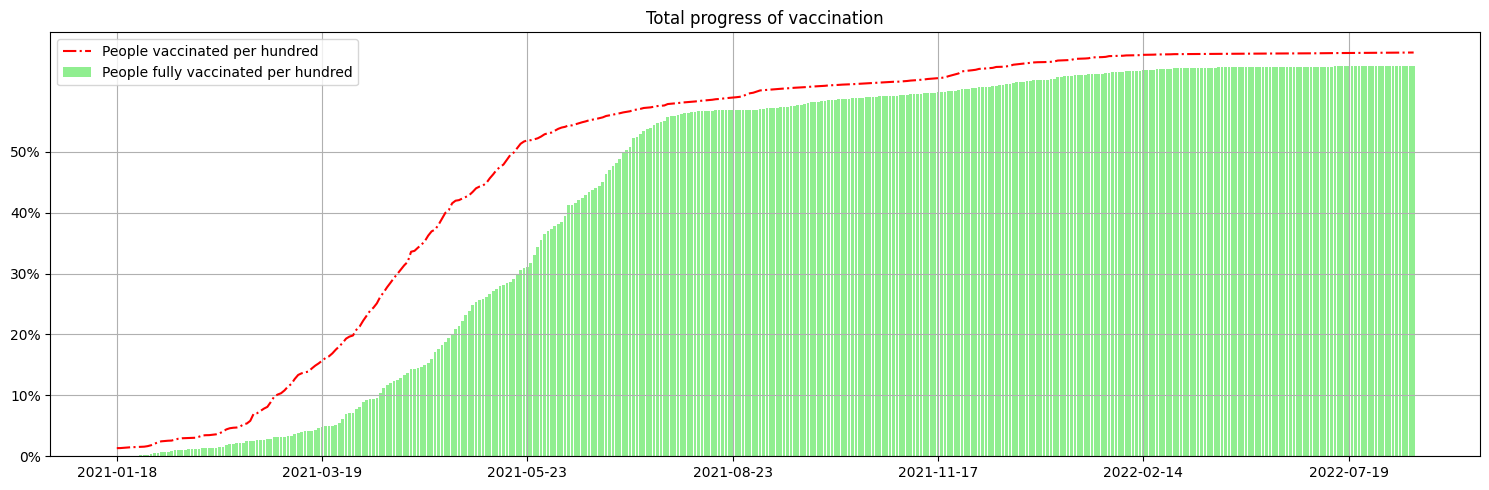

2022-12-04


In [31]:
plt.figure(figsize=(15, 5), dpi=100)
plt.bar(df_hungary['date'], df_hungary['people_fully_vaccinated_per_hundred'], label='People fully vaccinated per hundred', color='lightgreen')
plt.plot(df_hungary['date'], df_hungary['people_vaccinated_per_hundred'], label='People vaccinated per hundred', color='r', linestyle='-.')
plt.xticks(ticks=range(0, len(df_hungary['date']), 60), labels=df_hungary['date'][::60], rotation=0)
plt.yticks(ticks=range(0, 51, 10), labels=[f'{p}%' for p in range(0, 51, 10)])
plt.title('Total progress of vaccination')
plt.legend(loc=2)
plt.grid()
plt.tight_layout()
plt.show()

print(df_hungary.date.max())

In [32]:
print(data.total_boosters_per_hundred.describe())
data[data['country'] == 'Hungary'][['date', 'total_boosters_per_hundred']].describe()

count    58784.000000
mean        31.139552
std         29.343540
min          0.000000
25%          2.032392
50%         27.939796
75%         53.795344
max        140.532530
Name: total_boosters_per_hundred, dtype: float64


,total_boosters_per_hundred
count,195.000000
mean,29.845710
std,14.059796
min,3.324966
25%,14.600940
50%,35.422718
75%,42.383212
max,44.420666


       total_boosters_per_hundred
count                 1350.000000
mean                    33.784099
std                     21.249543
min                      0.500944
25%                      6.227000
50%                     43.233336
75%                     51.683975
max                     60.696110


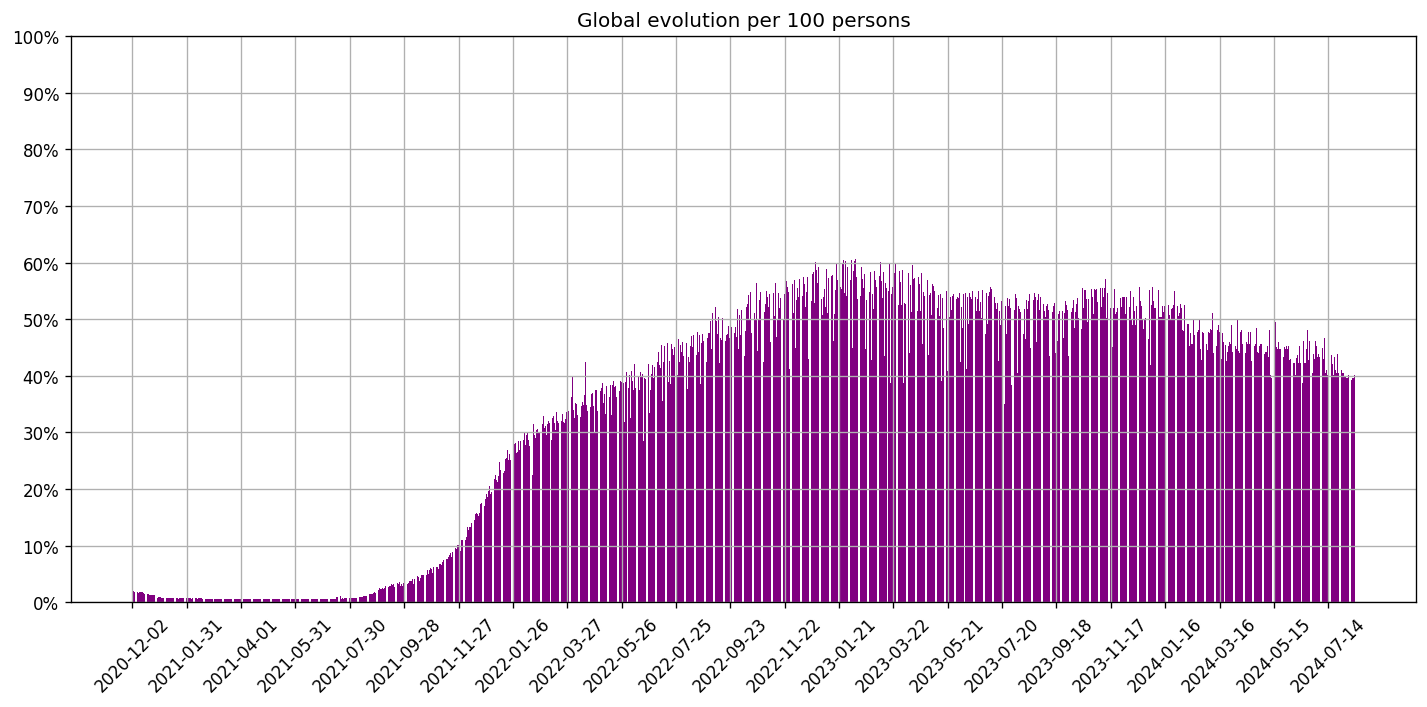

In [33]:
df_hungary = data.groupby('date', as_index=False)['total_boosters_per_hundred'].mean()
df_hungary = df_hungary.dropna()

print(df_hungary.describe())

plt.figure(figsize=(12, 6), dpi=120)
plt.bar(df_hungary['date'], df_hungary['total_boosters_per_hundred'], color='purple', linewidth=5)
plt.title('Global evolution per 100 persons')
plt.yticks(ticks=range(0, 101, 10), labels=[f'{t}%' for t in range(0, 101, 10)])
tick_indices = range(0, len(df_hungary['date']), 60)
plt.xticks(ticks=tick_indices, labels=df_hungary['date'].iloc[tick_indices], rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [35]:
df_hungary = data[data['country'] == 'Hungary'][['date', 'new_cases', 'new_vaccinations']].dropna()
df_hungary['date'] = pd.to_datetime(df_hungary['date'])
print(df_hungary)

             date  new_cases  new_vaccinations
210135 2021-01-19      573.0            1925.0
210136 2021-01-20      976.0            5327.0
210137 2021-01-21     1410.0            6214.0
210138 2021-01-22     1311.0            5330.0
210139 2021-01-23     1344.0            3264.0
...           ...        ...               ...
210266 2021-05-30        0.0           39061.0
210267 2021-05-31      506.0           73638.0
210268 2021-06-01      174.0           69276.0
210269 2021-06-02      275.0           58017.0
210270 2021-06-03      315.0           93527.0

[127 rows x 3 columns]


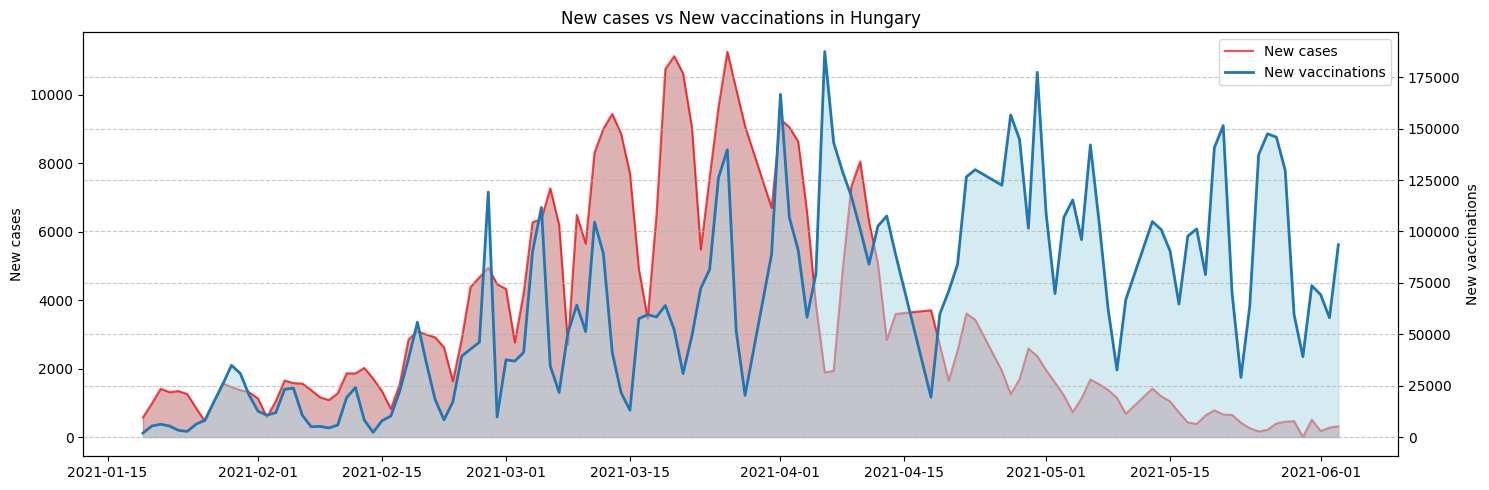

In [37]:
fig, ax1 = plt.subplots(figsize=(15, 5))
ax1.plot(df_hungary['date'], df_hungary['new_cases'], color='red', alpha=.7, label='New cases')
ax1.set_ylabel('New cases')
ax2 = ax1.twinx()
ax2.plot(df_hungary['date'], df_hungary['new_vaccinations'], color='#1f77b4', label='New vaccinations', linewidth=2)
ax2.set_ylabel('New vaccinations')
# ax2.tick_params(axis='y')
plt.title('New cases vs New vaccinations in Hungary')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

ax2.fill_between(df_hungary['date'], df_hungary['new_vaccinations'], color='lightblue', alpha=0.5)
ax1.fill_between(df_hungary['date'], df_hungary['new_cases'], color='darkred', alpha=0.3)

plt.grid(True, which="both", linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [38]:
#df_hungary = df_hungary[['date', 'new_vaccinations']]
print(df_hungary[['date', 'new_vaccinations']])

             date  new_vaccinations
210135 2021-01-19            1925.0
210136 2021-01-20            5327.0
210137 2021-01-21            6214.0
210138 2021-01-22            5330.0
210139 2021-01-23            3264.0
...           ...               ...
210266 2021-05-30           39061.0
210267 2021-05-31           73638.0
210268 2021-06-01           69276.0
210269 2021-06-02           58017.0
210270 2021-06-03           93527.0

[127 rows x 2 columns]


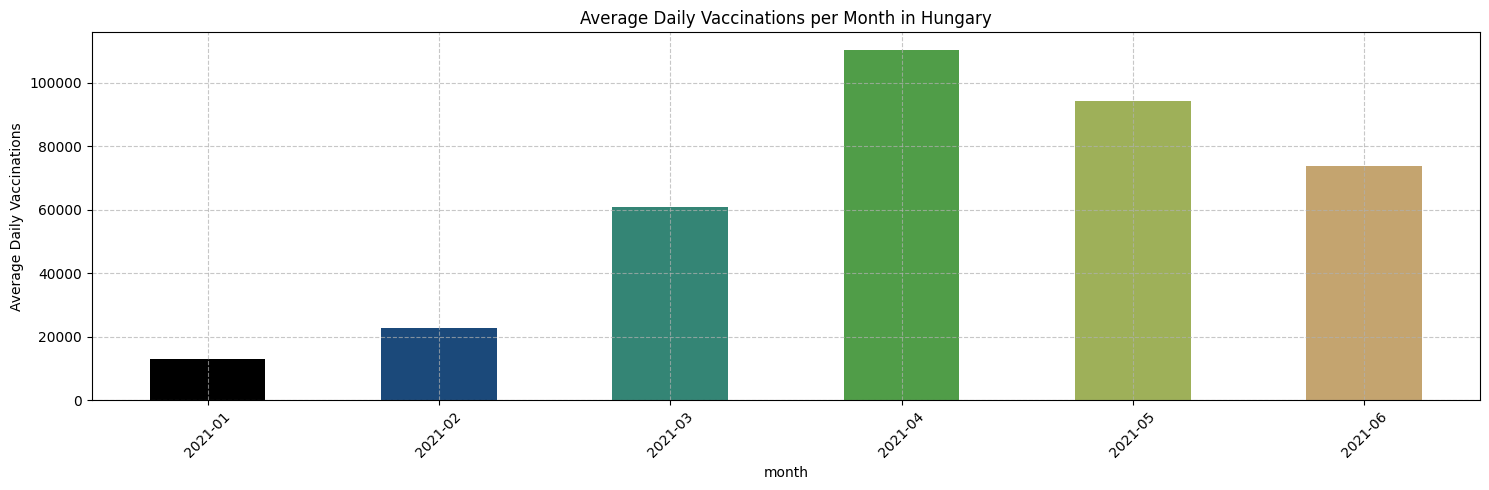

Average daily vaccination data per month:
month
2021-01     12908.15
2021-02     22778.57
2021-03     60749.66
2021-04    110289.44
2021-05     94172.48
2021-06     73606.67
Name: new_vaccinations, dtype: float64
Month with the highest vaccinations: 2021-04 (average: 110289.44)
Month with the lowest vaccinations: 2021-01 (average: 12908.15)


In [39]:
import numpy as np
df_hungary['date'] = pd.to_datetime(df_hungary['date'])
df_hungary['month'] = df_hungary['date'].dt.strftime('%Y-%m')  
avg = df_hungary.groupby('month')['new_vaccinations'].mean()
colors = plt.cm.gist_earth(np.linspace(0, 0.8, len(avg)))

plt.figure(figsize=(15, 5))
avg.plot(kind='bar', color=colors)
plt.title('Average Daily Vaccinations per Month in Hungary')
# plt.xlabel('Month')
plt.ylabel('Average Daily Vaccinations')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Average daily vaccination data per month:")
print(round(avg, 2))

max_month = avg.idxmax()
max_value = avg.max()
min_month = avg.idxmin()
min_value = avg.min()

print(f"Month with the highest vaccinations: {max_month} (average: {max_value:.2f})")
print(f"Month with the lowest vaccinations: {min_month} (average: {min_value:.2f})")